# Distance Estimation from Phase Measurements
In this task, you will work on the data in ‘./Lab_Data/lab3_task1.txt’. The setting of the data collection is as follows. We move the RFID tag in a straight line away from the RFID reader and collect phase measurements. We move the RFID tag away from the RFID reader by a distance d and collect phase measurements at each position. 

You are required to compute the phase change at different positions and use that to estimate the distance d as well as the total distance moved by the tag. 
Plot the phase variation vs Time as well as the distance variation vs time. 

In [ ]:
def get_phase_change(pha):
    pha_rad = np.deg2rad(pha)  # Convert degrees to radians (0 to π)
    pha_rad_doubled = pha_rad  # Scale to 0 to 2π radians
    pha_unwrapped = np.unwrap(pha_rad_doubled, period=np.pi)  # Unwrap phase
    pha_unwrapped_deg = np.rad2deg(pha_unwrapped)  # Convert back to degrees
    dpha = np.diff(pha_unwrapped_deg)  # Compute phase difference
    dpha = np.insert(dpha, 0, 0)  # Insert zero at the beginning
    return dpha

def get_dist_change(dpha, wavelength):
    ddist = (dpha / 360) * wavelength / 2  # Compute distance change
    return ddist

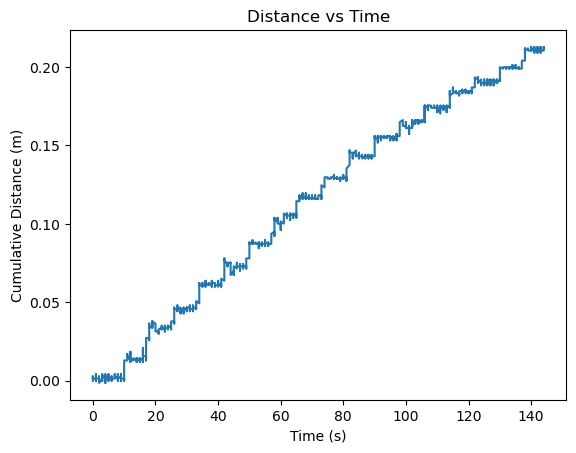

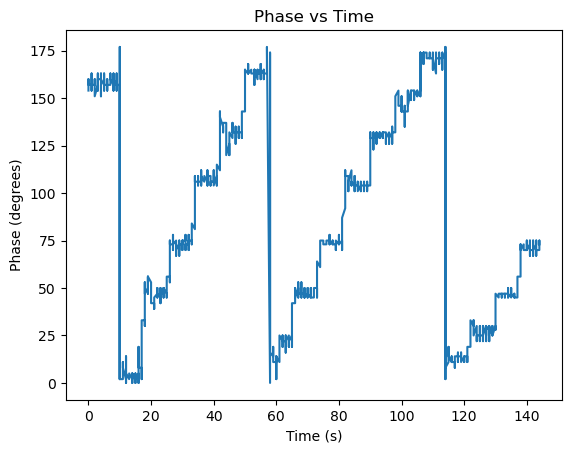

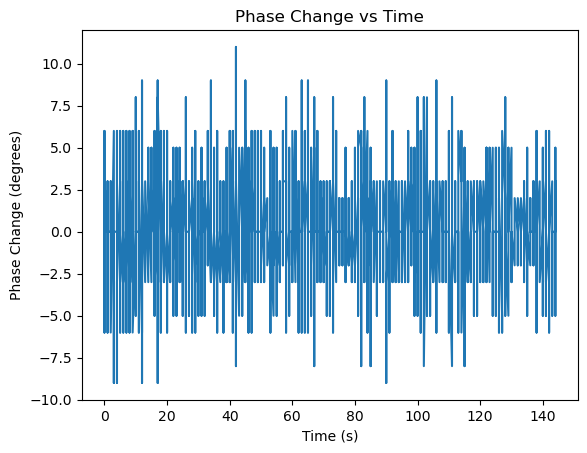

In [ ]:
# %%
from utils import read_data
## Task 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Insert data file path here
file = 'Lab_Data/lab3_task1.txt'

# Read data
channel_log = read_data(file)


# Extract and process data
pha = channel_log['Phase'].astype(float).values
freq = channel_log['Frequency'].iloc[0].astype(float) * 1e3
time = ((channel_log['hour'] * 60 + channel_log['minute']) * 60 + channel_log['second']).astype(float).values
time = time - time[0]
c = 3e8
# Compute phase change and distance change
dpha = get_phase_change(pha)
ddist = get_dist_change(dpha, wavelength= c / freq)

# Cumulative distance
dist = np.cumsum(ddist)

# Plotting Distance vs Time
plt.figure()
plt.plot(time, dist)
plt.xlabel('Time (s)')
plt.ylabel('Cumulative Distance (m)')
plt.title('Distance vs Time')

# Plotting Phase vs Time
plt.figure()
plt.plot(time, pha)
plt.xlabel('Time (s)')
plt.ylabel('Phase (degrees)')
plt.title('Phase vs Time')

# Plotting Phase Change vs Time
plt.figure()
plt.plot(time, dpha)
plt.xlabel('Time (s)')
plt.ylabel('Phase Change (degrees)')
plt.title('Phase Change vs Time')

plt.show()